*Data preparation:*

In [1]:
#Importing the required libraries.
import pandas as pd #for dataframes and reading csv files.
import numpy as np # for math operations(sqrt)
import matplotlib.pyplot as plt #for plotting the graphs
%matplotlib inline 
import seaborn as sns # for histogram
from sklearn.model_selection import train_test_split #for data and train set split
from sklearn.linear_model import LinearRegression #for linear regression
from scipy import stats
from sklearn import metrics #for measurement of errors

In [2]:
# Getting DataFrame for day_od.csv
file_day_od="data\\day_od.csv" #directory of the file(file_path)
#csv (comma seperated values, delimiter is comma)
data_day_od=pd.read_csv(file_day_od,sep=",",delimiter=',',header=0,quoting=3,quotechar='"',escapechar='"')
#seperate the columns by name
headerName=["MONTH","DOW","ORIGIN","DESTINATION","CUST_CLASS","COD_COUNTRY","COD_PRO","PRO_COM","FLOW"]
data_day_od.columns=headerName
day_od=pd.DataFrame(data_day_od)#dataFrame of the file(can be read more easily than csv)

# Getting DataFrame for distinct_users_day.csv
file_distinct_users_day="data\\distinct_users_day.csv"
data_distinct_users_day=pd.read_csv(file_distinct_users_day,sep=",",delimiter=',',header=0,quoting=3,escapechar="\"",encoding="latin-1")
distinct_users_day=pd.DataFrame(data_distinct_users_day)
distinct_users_day.head()

# Getting DataFrame for codici_istat_comune.csv
file_codici_istat_comune="data\\codici_istat_comune.csv"
data_codici_istat_comune=pd.read_csv(file_codici_istat_comune,sep=",",delimiter=',',header=0,quoting=3,escapechar="\"",encoding="latin-1")
codici_istat_comune=pd.DataFrame(data_codici_istat_comune)
codici_istat_comune.head()

# Getting DataFrame for codici_istat_provincia.csv
file_codici_istat_provincia="data\\codici_istat_provincia.csv"
data_codici_istat_provincia=pd.read_csv(file_codici_istat_provincia,sep=",",delimiter=',',header=0,quoting=3,escapechar="\"",encoding="latin-1")
codici_istat_provincia=pd.DataFrame(data_codici_istat_provincia)
codici_istat_provincia.head()

# Getting DataFrame for codici_nazioni.csv
file_codici_nazioni="data\\codici_nazioni.csv"
data_codici_nazioni=pd.read_csv(file_codici_nazioni,delimiter=',',header=0,quoting=3,error_bad_lines=False,encoding="Latin-1",quotechar = '"',escapechar='\"')
codici_nazioni=pd.DataFrame(data_codici_nazioni)

# Getting DataFrame for veneto.txt
file_veneto="data\\veneto.txt"
data_veneto=pd.read_csv(file_veneto,delimiter=';',header=0,quoting=0,error_bad_lines=False,encoding="Latin-1")
veneto=pd.DataFrame(data_veneto)


b'Skipping line 110: expected 2 fields, saw 3\n'


2. Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors

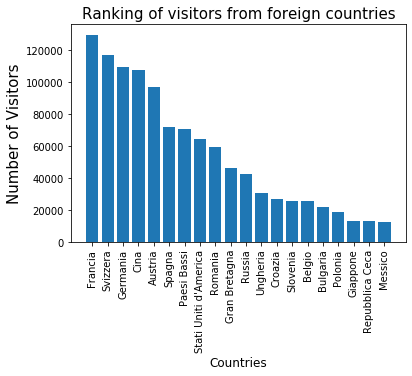

In [3]:
# Assignment 2

# read COD_COUNTRY for foreigner, then sum whole visitors
distinct_users_day_1=distinct_users_day[distinct_users_day.CUST_CLASS.str.contains(' '.join(['foreigner']))]
distinct_users_day_1=distinct_users_day_1.groupby(["COD_COUNTRY"],as_index=False)['VISITORS'].sum()
# sorting the number of visitors from most to least
sorted_distinct_users_day=distinct_users_day_1.sort_values( "VISITORS",ascending=False,inplace=False)
ranked_20=sorted_distinct_users_day.head(n=20) # First 20 countries are ranked
# Ranked Countries
cod_coun_ranked_20=["Francia",
"Svizzera",
"Germania",
"Cina",
"Austria",
"Spagna",
"Paesi Bassi",
"Stati Uniti d'America",
"Romania",
"Gran Bretagna",
"Russia",
"Ungheria",
"Croazia",
"Slovenia",
"Belgio",
"Bulgaria",
"Polonia",
"Giappone",
"Repubblica Ceca",
"Messico"]
#storing visitor and country names
visitors_ranked_20=ranked_20.VISITORS
ylabel=cod_coun_ranked_20
#plotting
plt.bar(cod_coun_ranked_20,visitors_ranked_20)
plt.xticks(rotation='vertical') # vertical label alignment
plt.rcParams['figure.figsize'] = [8, 6] # 8 by 6 inches
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=15)
plt.title('Ranking of visitors from foreign countries',fontsize=15)
plt.show()


3. Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.

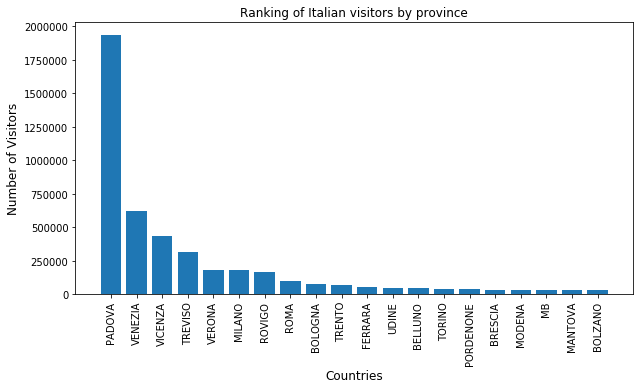

In [4]:
# Assignment 3

# read COD_PRO(province codes) for Italian visitors, then sum whole visitors
distinct_users_day_2=distinct_users_day[distinct_users_day.CUST_CLASS.str.contains(' '.join(['visitor']))]
distinct_users_day_2=distinct_users_day_2.groupby(['COD_PRO'],as_index=False)['VISITORS'].sum()
sorted_distinct_users_day_2=distinct_users_day_2.sort_values( "VISITORS",ascending=False,inplace=False) # sorting with sort_values
ranked_distinct_users_day_2=sorted_distinct_users_day_2.head(n=20)
visitors_distinct_users_day_2=ranked_distinct_users_day_2.VISITORS
cod_pro_distinct_users_day_2=["PADOVA","VENEZIA","VICENZA","TREVISO","VERONA","MILANO","ROVIGO","ROMA","BOLOGNA","TRENTO","FERRARA","UDINE","BELLUNO","TORINO","PORDENONE","BRESCIA","MODENA","MB","MANTOVA","BOLZANO"]

#plotting
plt.rcParams['figure.figsize'] = [10, 5] #10 by 5 inches
plt.bar(cod_pro_distinct_users_day_2,visitors_distinct_users_day_2);
plt.xticks(rotation='vertical');
plt.xlabel('Countries', fontsize=12);
plt.ylabel('Number of Visitors', fontsize=12);
plt.title('Ranking of Italian visitors by province',fontsize=12);


4. Study of the visitors' fluxes: let's assume to be asked to provide indications of how to invest resources to improve the mobility toward Padova. Defined the three main directions of visitors and commuter getting to Padova by the Italian highways (sud: A13 toward Bologna-Roma / west: A4 toward Milano-Torino / north-east: A4 toward Venice-Trieste), evaluate which of the three directions has to be prioritized:
 * Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only

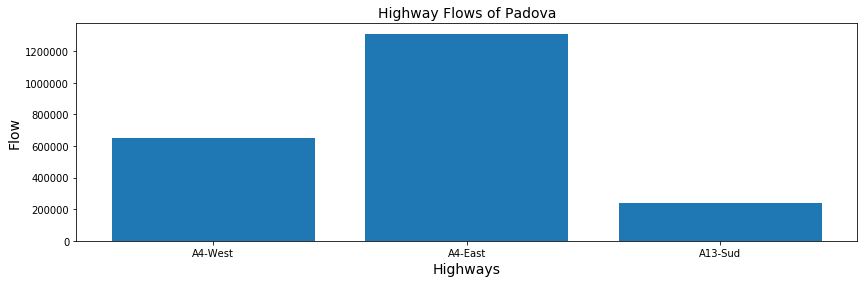

In [13]:
#Assignment 4

#4.1
#for Commuters
df_flux_commuter=day_od[day_od.CUST_CLASS.str.contains(' '.join(['visitor']))] # Select Visitor(Commuter) only
df_flux_sorted_commuter=df_flux_commuter.groupby(["COD_PRO"],as_index=False)['FLOW'].sum()#sorted by COD_PRO and FLOWs summed.

#sud
rovigo_commuter=df_flux_sorted_commuter.iloc[[27]] # 27th row of dataframe is Rovigo
ferrera_commuter=df_flux_sorted_commuter.iloc[[36]] # 36th row of dataframe is Ferrera
bologna_commuter=df_flux_sorted_commuter.iloc[[35]] # 35th row of dataframe is Bologna
rome_commuter=df_flux_sorted_commuter.iloc[[54]] # 54st row of dataframe is Rome
#west
vicenza_commuter=df_flux_sorted_commuter.iloc[[22]] # 22nd row of dataframe is Vicenza
verona_commuter=df_flux_sorted_commuter.iloc[[21]] # 21st row of dataframe is Verona
brescia_commuter=df_flux_sorted_commuter.iloc[[15]] # 15th row of dataframe is Brescia
bergamo_commuter=df_flux_sorted_commuter.iloc[[14]] # 14th row of dataframe is Bergamo
torino_commuter=df_flux_sorted_commuter.iloc[[1]] # 1st row of dataframe is Torino
milano_commuter=df_flux_sorted_commuter.iloc[[13]] # 13th row of dataframe is Milano
#east
treviso_commuter=df_flux_sorted_commuter.iloc[[24]] # 24th row of dataframe is Treviso
venezia_commuter=df_flux_sorted_commuter.iloc[[25]] # 25th row of dataframe is Venice
trieste_commuter=df_flux_sorted_commuter.iloc[[30]] # 30th row of dataframe is Trieste

a4_highway_milan_torino_commuter = (vicenza_commuter.FLOW.iloc[0]) + (verona_commuter.FLOW.iloc[0]) + (brescia_commuter.FLOW.iloc[0])  
a4_highway_venice_trieste_commuter = (venezia_commuter.FLOW.iloc[0]) + (treviso_commuter.FLOW.iloc[0])
a13_highway_bologna_rome_commuter = (bologna_commuter.FLOW.iloc[0]) + (ferrera_commuter.FLOW.iloc[0]) + (rovigo_commuter.FLOW.iloc[0])

highways_commuter=[a4_highway_milan_torino_commuter,a4_highway_venice_trieste_commuter,a13_highway_bologna_rome_commuter]
highway_names=["A4-West","A4-East","A13-Sud"]

plt.bar(highway_names,highways_commuter);
plt.xlabel('Highways', fontsize=14);
plt.ylabel('Flow', fontsize=14);
plt.title('Highway Flows of Padova',fontsize=14);


* Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week

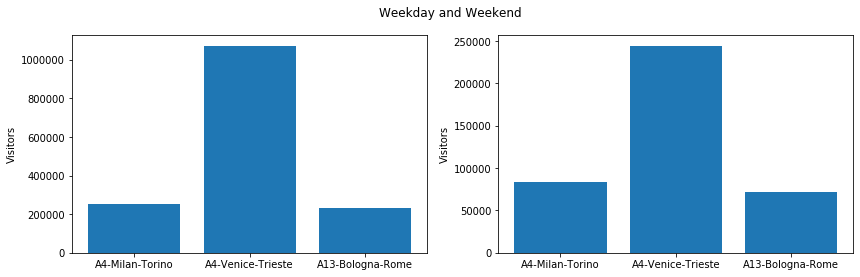

In [16]:
#4.2
df_flux_2=day_od[day_od.CUST_CLASS.str.contains(' '.join(['visitor']))]
# getting values of all cities on the sud-west-east
# e.g Bologna = 32
week=df_flux_2[(df_flux_2['COD_PRO'] == 27)|
                  (df_flux_2['COD_PRO'] == 32)|
                  (df_flux_2['COD_PRO'] == 37)|
                  (df_flux_2['COD_PRO'] == 58)|
                  (df_flux_2['COD_PRO'] == 15)|
                  (df_flux_2['COD_PRO'] == 29)|
                  (df_flux_2['COD_PRO'] == 38)|
                  (df_flux_2['COD_PRO'] == 48)|
                  (df_flux_2['COD_PRO'] == 24)|
                  (df_flux_2['COD_PRO'] == 23)|
                  (df_flux_2['COD_PRO'] == 17)|
                  (df_flux_2['COD_PRO'] == 16)|
                  (df_flux_2['COD_PRO'] == 26)|
                  (df_flux_2['COD_PRO'] == 1)]

days_of_week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
highway_namess=["A4-Milan-Torino","A4-Venice-Trieste","A13-Bologna-Rome"]
#sorted provinces grouped by days
week_sorted=week.groupby(["DOW","COD_PRO"],as_index=False)['FLOW'].sum()

#weekday seperation------------------------------------------------------
weekend=week_sorted[(week_sorted["DOW"]=="\"Sabato\"") |
                    (week_sorted["DOW"]=="\"Domenica\"") ]

weekday=week_sorted[(week_sorted["DOW"]=="\"Lunedì\"") |
                    (week_sorted["DOW"]=="\"Martedì\"")|
                    (week_sorted["DOW"]=="\"Mercoledì\"")|
                    (week_sorted["DOW"]=="\"Giovedì\"")|
                    (week_sorted["DOW"]=="\"Venerdì\"")]

weekend=weekend.groupby(["COD_PRO"],as_index=False)["FLOW"].sum()
weekday=weekday.groupby(["COD_PRO"],as_index=False)["FLOW"].sum()

day_monday=week_sorted[(week_sorted["DOW"]=="\"Lunedì\"")]
day_tuesday=week_sorted[(week_sorted["DOW"]=="\"Martedì\"")]
day_wednesday=week_sorted[(week_sorted["DOW"]=="\"Mercoledì\"")]
day_thursday=week_sorted[(week_sorted["DOW"]=="\"Giovedì\"")]
day_friday=week_sorted[(week_sorted["DOW"]=="\"Venerdì\"")]
day_saturday=week_sorted[(week_sorted["DOW"]=="\"Sabato\"")]
day_sunday=week_sorted[(week_sorted["DOW"]=="\"Domenica\"")]


# weekday and weekend for 3 directions
a4_west_weekday=weekday.FLOW.iloc[:5].sum() # first 5 entries corresponds to a4_west
a4_west_weekend=weekend.FLOW.iloc[:5].sum()

a4_east_weekday=weekday.FLOW.iloc[[6,7,9]].sum()# 6th, 7th, 9th entries corresponds to a4_east
a4_east_weekend=weekend.FLOW.iloc[[6,7,9]].sum()

a13_weekday=weekday.FLOW.iloc[[8,10,11,12,13]].sum() # 8th, 10th, 11th, 12th, 13th entries corresponds to a13
a13_weekend=weekend.FLOW.iloc[[8,10,11,12,13]].sum()

# day by day for 3 directions
a4_west_monday=day_monday.FLOW.iloc[:5].sum()
a4_west_tuesday=day_tuesday.FLOW.iloc[:5].sum()
a4_west_wednesday=day_wednesday.FLOW.iloc[:5].sum()
a4_west_thursday=day_thursday.FLOW.iloc[:5].sum()
a4_west_friday=day_friday.FLOW.iloc[:5].sum()
a4_west_saturday=day_saturday.FLOW.iloc[:5].sum()
a4_west_sunday=day_sunday.FLOW.iloc[:5].sum()

a4_east_monday=day_monday.FLOW.iloc[[6,7,9]].sum()
a4_east_tuesday=day_tuesday.FLOW.iloc[[6,7,9]].sum()
a4_east_wednesday=day_wednesday.FLOW.iloc[[6,7,9]].sum()
a4_east_thursday=day_thursday.FLOW.iloc[[6,7,9]].sum()
a4_east_friday=day_friday.FLOW.iloc[[6,7,9]].sum()
a4_east_saturday=day_saturday.FLOW.iloc[[6,7,9]].sum()
a4_east_sunday=day_sunday.FLOW.iloc[[6,7,9]].sum()

a13_monday=day_monday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_tuesday=day_tuesday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_wednesday=day_wednesday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_thursday=day_thursday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_friday=day_friday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_saturday=day_saturday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_sunday=day_sunday.FLOW.iloc[[8,10,11,12,13]].sum()

a4_west_days=[a4_west_monday,a4_west_tuesday,a4_west_wednesday,a4_west_thursday,a4_west_friday,a4_west_saturday,a4_west_sunday]
a4_east_days=[a4_east_monday,a4_east_tuesday,a4_east_wednesday,a4_east_thursday,a4_east_friday,a4_east_saturday,a4_east_sunday]
a13_days=[a13_monday,a13_tuesday,a13_wednesday,a13_thursday,a13_friday,a13_saturday,a13_sunday]

#summation for plotting 
highways_monday=[a4_west_monday,a4_east_monday,a13_monday]
highways_tuesday=[a4_west_tuesday,a4_east_tuesday,a13_tuesday]
highways_wednesday=[a4_west_wednesday,a4_east_wednesday,a13_wednesday]
highways_thursday=[a4_west_thursday,a4_east_thursday,a13_thursday]
highways_friday=[a4_west_friday,a4_east_friday,a13_friday]

weekend_highways=[a4_west_weekend,a4_east_weekend,a13_weekend]
weekday_highways=[a4_west_weekday,a4_east_weekday,a13_weekday]

# plotting phase

plt.rcParams['figure.figsize'] = [14, 4] # 14 by 4 inches

fig, (ax1, ax2) = plt.subplots(1,2);

fig.suptitle('Weekday and Weekend');
ax1.set_ylabel('Visitors')
ax2.set_ylabel('Visitors')

ax1.bar(highway_namess, weekday_highways);
ax2.bar(highway_namess, weekend_highways);



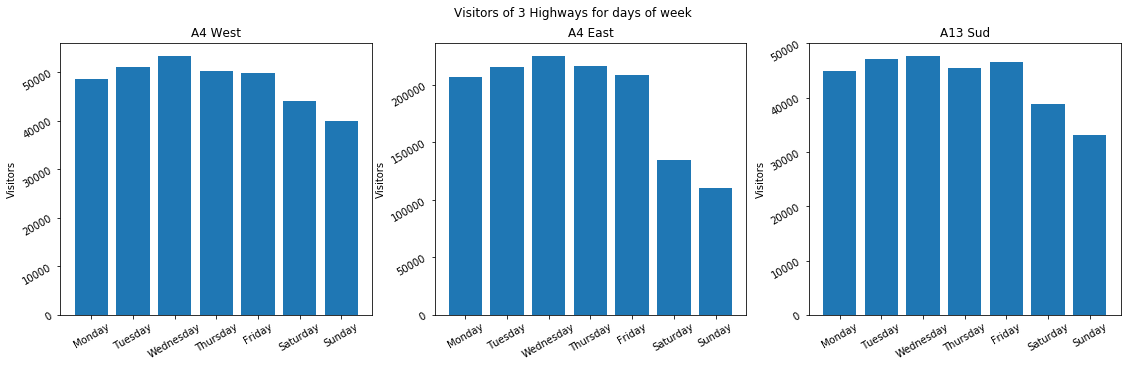

In [7]:
## Weekday Graphs of 3 Highways

plt.rcParams['figure.figsize'] = [19, 5] # 19(x) by 5(y) inches
fig, (ax1, ax2, ax3) = plt.subplots(1,3); # 1x3 subplot

# title and label setting
fig.suptitle('Visitors of 3 Highways for days of week');
ax1.title.set_text('A4 West')
ax2.title.set_text('A4 East')
ax3.title.set_text('A13 Sud')
ax1.set_ylabel('Visitors')
ax2.set_ylabel('Visitors')
ax3.set_ylabel('Visitors')

# angled x labels
ax2.tick_params(labelrotation=30)
ax1.tick_params(labelrotation=30)
ax3.tick_params(labelrotation=30)

# bar graph axis of subplots
ax1.bar(days_of_week, a4_west_days);
ax2.bar(days_of_week, a4_east_days);
ax3.bar(days_of_week, a13_days);

5. Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of law should be used to describe the distribution

In [8]:
#preparing dataset for distribution of the number of visitors by the distance of the province of origin

#elimination of commas and last digits from dataset
data_veneto['Origine'] = data_veneto['Origine'].astype(str).str[:-3]
data_veneto['Total_Mete'] = data_veneto['Total_Mete'].astype(str).str[:6]
data_veneto['Destinazione'] = data_veneto['Destinazione'].astype(str).str[:5]

# take just Padova(center of Padova = 28001) entries
data_veneto_2 = data_veneto[(data_veneto['Destinazione'] == '28001')]

# taking province Capitals(like Bologna,Padova,Torino)
data_codici_istat_comune = data_codici_istat_comune[(data_codici_istat_comune['COMUNE_CAPOLUOGO'] == 1)]
data_codici_istat_comune['PRO_COM'] = data_codici_istat_comune['PRO_COM'].astype(str)

# merge operation for linking the "PRO_COM Destination Total Meter Comune and Visitor" columns
merged_first = (data_veneto_2.merge(data_codici_istat_comune, left_on='Origine', right_on='PRO_COM')
        .reindex(columns=['PRO_COM', 'Destinazione','Total_Mete','COMUNE']))

#elimination of commas from PRO_COM values
data_distinct_users_day['PRO_COM'] = data_distinct_users_day['PRO_COM'].astype(str).str[:-2]
#summation of Visitors 
data_distinct_users_day_2 = data_distinct_users_day.groupby(['PRO_COM'])[['VISITORS']].sum()

#final merge operation 
merged_final = pd.merge(merged_first, data_distinct_users_day_2, on='PRO_COM', how='inner')
merged_final.head(n=3)

# Print to CSV file!
# merged_final.to_csv (r'data\\result.csv', index = False, header=True) 

,PRO_COM,Destinazione,Total_Mete,COMUNE,VISITORS
0,1272,28001,381587,Torino,23420
1,6003,28001,323323,Alessandria,1896
2,2158,28001,314338,Vercelli,860


,PRO_COM,Destinazione,Total_Mete,COMUNE,VISITORS
0,1272,28001,381587,Torino,23420
1,6003,28001,323323,Alessandria,1896
2,2158,28001,314338,Vercelli,860
3,26086,28001,69240,Treviso,39864
4,97042,28001,266729,Lecco,1900
...,...,...,...,...,...
89,62008,28001,692191,Benevento,792
90,57059,28001,479605,Rieti,472
91,93033,28001,118634,Pordenone,9120
92,60038,28001,548972,Frosinone,848


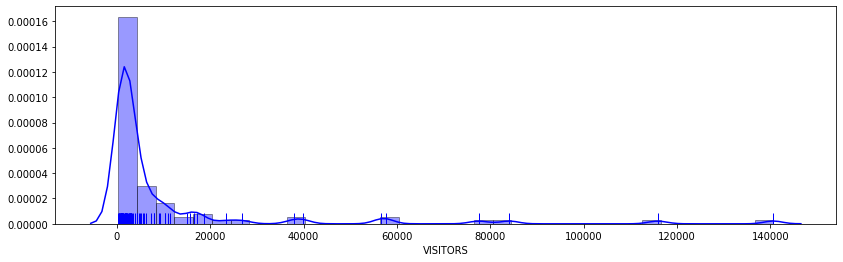

In [20]:
#read from result csv
file_histogram="data\\result.csv" 
data_histogram=pd.read_csv(file_histogram,delimiter=',',header=0,quoting=3,error_bad_lines=False)
df_histogram=pd.DataFrame(data_histogram)

# sorting Total Meters by ascending order
histogram_values=df_histogram.sort_values("Total_Mete",ascending=True)
histogram_visitors=histogram_values.VISITORS[1:94]  
histogram_comunes=histogram_values.COMUNE[1:94]

sns.distplot(histogram_visitors, hist=True,rug=True, kde=True, bins=int(35), color = 'blue',hist_kws={'edgecolor':'black'},norm_hist=False,label='Distance');

df_histogram

* Assuming an analityc form can be used to describe the trend, create a regression to estimate the expected number of visitors by the distance of the province of origin. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

18133.785933228457
[-0.02886768]
[ 16148.55571669   3674.54337309  12988.55534365   3845.38229153
  -1848.16097411  10433.9390461   13498.24306654   8285.43324275
  -2724.29500162 -10157.83755913  12651.64067363   5386.42554658
   7846.84661079  -4201.7716297   15076.26581712  16725.04324649
   9243.20506367  -8522.62793843  14272.35871998  11468.7875673
  -5602.4313666   17805.50269893   -214.53907569  -2431.83655573
  11211.54768858  12688.33149238   8777.28074064   5884.99921344
  16792.16059785  -1688.37837634  11070.29814009  11978.15774573]


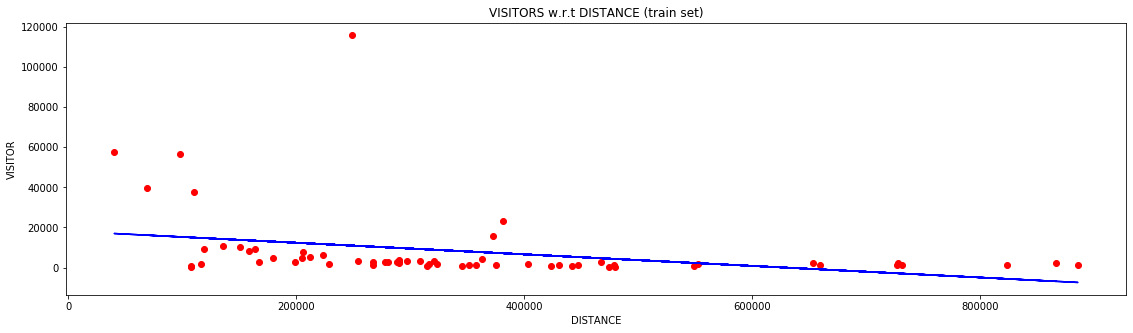

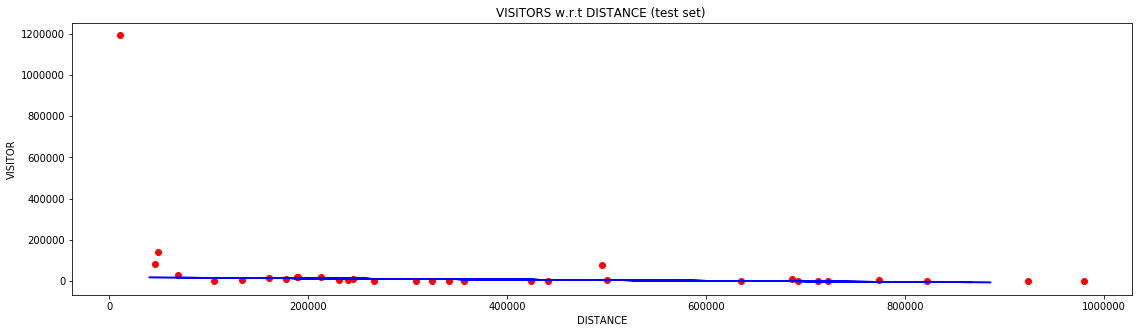

     Actual     Predicted
0     26888  16148.555717
1      2440   3674.543373
2      7364  12988.555344
3     77520   3845.382292
4       792  -1848.160974
5      1900  10433.939046
6     15120  13498.243067
7      1472   8285.433243
8       744  -2724.295002
9      1056 -10157.837559
10    16588  12651.640674
11     1924   5386.425547
12     1188   7846.846611
13     4420  -4201.771630
14      368  15076.265817
15   140600  16725.043246
16     1376   9243.205064
17     1696  -8522.627938
18     5756  14272.358720
19     2532  11468.787567
20     1092  -5602.431367
21  1193188  17805.502699
22      796   -214.539076
23     1064  -2431.836556
24     5652  11211.547689
25    18592  12688.331492
26      848   8777.280741
27      992   5884.999213
28    84048  16792.160598
29    11488  -1688.378376
30    10268  11070.298140
31    17076  11978.157746
Mean Absolute Error: 50611.47959566699
Mean Squared Error: 44010235173.11953
Root Mean Squared Error: 209786.16535205444


In [10]:
# regression part

df_histogram_1=df_histogram
df_histogram_1=df_histogram_1.drop(["PRO_COM","Destinazione","COMUNE"],axis=1) # drop the "PRO_COM","Destinazione","COMUNE" columns

# taking first column and the second column
X = df_histogram_1.iloc[:, :-1].values.reshape((-1, 1)) # reshape((-1,1)) --> Transpose 
y = df_histogram_1.iloc[:, 1].values

#data set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123, shuffle=1)

#training part
model = LinearRegression()
model.fit(X_train, y_train)

#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

#prediction part
y_pred = model.predict(X_test)
print(y_pred)

# measuring actual and predicted values
actual_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#Train Data Visualization
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('VISITORS w.r.t DISTANCE (train set)')
plt.xlabel('DISTANCE')
plt.ylabel('VISITOR')
plt.show()

#Test Data Visualization
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('VISITORS w.r.t DISTANCE (test set) ')
plt.xlabel('DISTANCE')
plt.ylabel('VISITOR')
plt.show()

print(actual_predicted)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))